In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


import requests
import urllib.request
import time 


pages = np.arange(1,1542,1)

link = []
fiyatlar = []
markalar = []
bedenler = []
kullanicilar = []
likes = []
comments = []
kategori = []
yorumlar = []

for i, value in enumerate(pages):
    
    
    get_url = "https://www.modacruz.com/c/gelinlik?pg?=" + str(value)
    link.append(get_url)
    page = requests.get(link[i])
    soup = BeautifulSoup(page.content, 'html.parser')
    asd = soup.find_all("div",{"class" : "_mB _aH _Q"})
    
    for prod in asd:
        
        fiyat = prod.find("div",{"class" : "_rY"}).text.replace("\n","").strip()  
        marka = prod.find("span",{"class" : "_lc"}).text.replace("\n","").strip()
        kats = prod.find("span",{"class" : "_ld"}).text.replace("\n","").strip()
        beden = prod.find("span",{"class" : "_s0"}).text.replace("\n","").strip()
        like = prod.find("a",{"class" : "_lh undefined"}).text.replace("\n","").strip()
        comment = prod.find("span",{"class" : "_lf"}).text.replace("\n","").strip() 
        kullanici = prod.find("span",{"class" : "_sX"}).text.replace("\n","").strip()
        yorum = prod.find("span",{"class" : "_nh _dT"}).text.replace("\n","").strip()
        
        kategori.append(kats)
        bedenler.append(beden)
        comments.append(comment)
        likes.append(like)        
        markalar.append(marka)
        fiyatlar.append(fiyat)
        kullanicilar.append(kullanici)
        yorumlar.append(yorum)
        
print(markalar)

df = pd.DataFrame({'kullanicilar':kullanicilar,'markalar':markalar,
                   'fiyatlar':fiyatlar,'bedenler':bedenler,'kategori':kategori,
                   'begeniler':likes,'yorumlar':comments,'Gelen_yorumlar' : yorumlar}) 
df.to_csv('gelinlik_yorumlar.csv', index=False, encoding='utf-8')






AttributeError: 'NoneType' object has no attribute 'text'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('abiye3.csv')

In [7]:
df.head()

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
0,Hlkrc,Trendyol,70 TL,S / 36,Mini,4.0,NaN
1,bennarii,Diğer,60 TL,S / 36,Mini,NaN,NaN
2,bgmglck,Diğer,600 TL,XL / 42,Nişan Elbisesi,NaN,NaN
3,bgmglck,Odrella,450 TL,4XL / 48,Resmi Gece,NaN,NaN
4,edc0109,Javelin,68 TL,XXL / 44,Kına Elbisesi,NaN,NaN


In [ ]:
df.columns


Index(['kullanicilar', 'markalar', 'fiyatlar', 'bedenler', 'kategori',
       'begeniler', 'yorumlar'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95695 entries, 0 to 95694
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   kullanicilar  95695 non-null  object
 1   markalar      95695 non-null  object
 2   fiyatlar      95695 non-null  object
 3   bedenler      95695 non-null  object
 4   kategori      95695 non-null  object
 5   begeniler     95695 non-null  object
 6   yorumlar      95695 non-null  object
dtypes: object(7)
memory usage: 5.1+ MB


In [ ]:
df.shape


(95695, 7)

In [ ]:

#Fiyatlar columndaki Tl' yi kaldırma
#df['fiyatlar'] = df['fiyatlar'].str.strip('TL')
#df['fiyatlar'] = df['fiyatlar'].str.replace('TL', '')
df['fiyatlar'] = pd.to_numeric(df['fiyatlar'],errors='coerce')
df['begeniler'] = pd.to_numeric(df['begeniler'],errors='coerce')
df['yorumlar'] = pd.to_numeric(df['yorumlar'],errors='coerce')
df['kategori'] = df['kategori'].astype('category')
df['markalar'] = df['markalar'].astype('category')
df['bedenler'] = df['bedenler'].astype('category')

In [ ]:
df.dtypes

kullanicilar      object
markalar        category
fiyatlar         float64
bedenler        category
kategori        category
begeniler        float64
yorumlar         float64
dtype: object

In [ ]:
print("Bu veri setinde {} adet observations ve {} adet feature var. \n".format(df.shape[0],df.shape[1]))

print("Bu veri setindeki {} adet benzersiz markalar veri tipi bulunur.  İlk 5 tanesi :  {}... \n".format(len(df.markalar.unique()),                                                                                                
                                                                           ", ".join(df.markalar.unique()[0:5])))

print("Bu veri setindeki {} adet benzersiz bedenler veri tipi bulunur. İlk 5 tanesi :  {}... \n".format(len(df.bedenler.unique()),                                                                                                
                                                                           " ".join(str(df.bedenler.unique()[0:5]))))
                                                                                      

Bu veri setinde 95695 adet observations ve 7 adet feature var. 

Bu veri setindeki 2036 adet benzersiz markalar veri tipi bulunur.  İlk 5 tanesi :  Diğer, Trendyol, Alfabeta, Markasız Ürün, Butik Ürünü... 

Bu veri setindeki 31 adet benzersiz bedenler veri tipi bulunur. İlk 5 tanesi :  [ M   /   3 8 ,   X S   /   3 4 ,   3 X L   /   4 6 ,   L   /   4 0 ,   8 ] 
 C a t e g o r i e s   ( 3 1 ,   o b j e c t ) :   [ M   /   3 8 ,   X S   /   3 4 ,   3 X L   /   4 6 ,   L   /   4 0 ,   . . . ,   1 6 ,   X L ,   3 3 ,   1 8 ]... 



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyatlar,91985.0,176.243572,175.515446,2.0,60.0,100.0,219.0,999.0
begeniler,60654.0,3.062486,3.359743,1.0,1.0,2.0,4.0,91.0
yorumlar,12382.0,4.628170,6.653274,1.0,1.0,2.0,5.0,121.0


In [ ]:
g = df.groupby('kategori').size()
g.sort_values(ascending=False)

kategori
Kokteyl Parti           23940
Resmi Gece              12861
Mezuniyet               12250
Tuvalet                 12041
Nişanlık                11960
Mini                     9669
Kına Elbisesi            8657
Uzun Abiye & Tuvalet     2173
Nişan Elbisesi           1987
Balık Abiye                89
Payetli Elbise             36
Abiye Tulum                21
Mini Elbise                 4
Maxi Elbise                 3
Maxi & Uzun Elbise          2
Günlük Elbise               2
dtype: int64

In [ ]:
df.groupby('bedenler').size()

bedenler
0              268
10              22
12              34
14              18
16               7
18               2
2              128
20               1
33              11
3XL / 46      1533
4              119
4XL / 48       911
5XL / 50       458
6               40
6XL / 52       211
7XL / 54       141
8              111
L              162
L / 40       13797
M              454
M / 38       28669
S              497
S / 36       29671
Tek Beden      150
XL              39
XL / 42       7495
XS              77
XS / 34       6560
XXL              9
XXL / 44      3322
XXS / 32       778
dtype: int64

In [ ]:
df.groupby('kategori').describe().T

kategori         Abiye Tulum  Balık Abiye  ...       Tuvalet  Uzun Abiye & Tuvalet
fiyatlar  count    21.000000    86.000000  ...  11343.000000           1990.000000
          mean    154.428571   248.593023  ...    236.233977            259.242211
          std     172.403182   180.642408  ...    197.227067            209.730339
          min      25.000000    50.000000  ...      5.000000              5.000000
          25%      60.000000   102.500000  ...    100.000000            100.000000
          50%     120.000000   194.000000  ...    160.000000            190.000000
          75%     150.000000   300.000000  ...    300.000000            350.000000
          max     820.000000   750.000000  ...    999.000000            999.000000
begeniler count     3.000000    22.000000  ...   7914.000000           1484.000000
          mean      1.000000     1.454545  ...      3.139373              3.904313
          std       0.000000     1.534594  ...      3.348786              4.335431
          min       1.000000     1.000000  ...      1.000000              1.000000
          25%       1.000000     1.000000  ...      1.000000              1.000000
          50%       1.000000     1.000000  ...      2.000000              2.000000
          75%       1.000000     1.000000  ...      4.000000              5.000000
          max       1.000000     8.000000  ...     57.000000             43.000000
yorumlar  count     0.000000     0.000000  ...   1902.000000            354.000000
          mean           NaN          NaN  ...      5.210305              4.627119
          std            NaN          NaN  ...      7.596127              5.861184
          min            NaN          NaN  ...      1.000000              1.000000
          25%            NaN          NaN  ...      1.000000              1.000000
          50%            NaN          NaN  ...      2.000000              2.000000
          75%            NaN          NaN  ...      6.000000              5.000000
          max            NaN          NaN  ...     97.000000             38.000000

[24 rows x 16 columns]

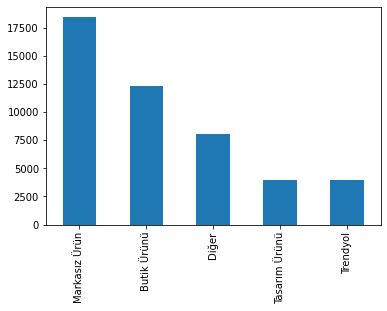

In [ ]:
df.markalar.value_counts().nlargest().plot(kind="bar")

In [ ]:
gb = df.groupby(['markalar', 'bedenler'])
gb.apply(lambda _df: _df.sort_values(by=['fiyatlar']))

kullanicilar   markalar  ...  begeniler yorumlar
markalar  bedenler                                    ...                    
1000 Hour 3XL / 46 75729           yadoco  1000 Hour  ...        2.0      NaN
                   75730           yadoco  1000 Hour  ...        2.0      NaN
                   3357          seher211  1000 Hour  ...        3.0      2.0
                   85162    cevrimbusra57  1000 Hour  ...        1.0      NaN
                   39325        nesderler  1000 Hour  ...        1.0      NaN
...                                   ...        ...  ...        ...      ...
İpekyol   XXL / 44 26476     nadyauurluel    İpekyol  ...        4.0      NaN
                   56568      sevdali2626    İpekyol  ...        8.0      NaN
          XXS / 32 77596       havvagul12    İpekyol  ...        5.0      NaN
                   54940    abdulkadireda    İpekyol  ...        2.0      NaN
                   78082  burcukocaguneli    İpekyol  ...        2.0      NaN

[95695 rows x 7 columns]

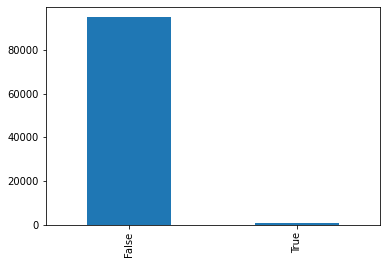

In [ ]:
bin_hour = df.markalar.str.contains("1000 Hour")
pd.DataFrame(bin_hour)
bin_hour.value_counts().plot(kind="bar")
plt.show()


In [ ]:
bin_hour.value_counts()

False    95002
True       693
Name: markalar, dtype: int64

In [ ]:
pd.crosstab(df.markalar,df.fiyatlar)

fiyatlar,2.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,...,842.0,843.0,845.0,849.0,850.0,855.0,856.0,859.0,865.0,869.0,870.0,875.0,880.0,888.0,890.0,893.0,899.0,900.0,910.0,920.0,925.0,930.0,935.0,940.0,945.0,946.0,950.0,953.0,963.0,965.0,968.0,970.0,975.0,980.0,984.0,985.0,987.0,990.0,995.0,999.0
markalar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000 Hour,0,7,0,0,0,0,3,1,2,0,0,4,0,0,0,0,21,0,1,0,2,7,0,0,0,0,17,0,1,0,0,5,0,1,0,1,14,0,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
17 Sundays,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1v1y,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,4,0,0,0,0,2,0,0,0,0,8,0,0,0,0,7,0,0,0,1,12,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2 Star,0,3,0,0,0,0,2,0,0,0,0,1,0,0,1,0,3,0,0,0,0,4,0,0,0,0,6,0,0,0,0,4,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2 Ters 1 Düz,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,3,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
İhya,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
İkikız,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
İnci,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(df.kategori,df.fiyatlar)

fiyatlar,2.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,...,842.0,843.0,845.0,849.0,850.0,855.0,856.0,859.0,865.0,869.0,870.0,875.0,880.0,888.0,890.0,893.0,899.0,900.0,910.0,920.0,925.0,930.0,935.0,940.0,945.0,946.0,950.0,953.0,963.0,965.0,968.0,970.0,975.0,980.0,984.0,985.0,987.0,990.0,995.0,999.0
kategori,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abiye Tulum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Balık Abiye,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Günlük Elbise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kokteyl Parti,0,16,1,2,3,0,62,2,6,4,2,119,7,7,11,18,434,1,13,6,7,337,44,58,20,21,561,1,15,3,21,504,6,10,32,56,862,17,20,23,...,0,1,0,1,35,0,0,1,0,0,0,1,1,0,3,0,1,44,1,0,0,0,0,1,1,0,33,0,0,0,0,1,1,1,0,1,0,4,1,4
Kına Elbisesi,1,13,0,4,1,2,21,0,2,2,1,31,5,2,5,4,70,1,5,1,1,84,0,4,2,4,99,0,0,2,1,83,2,1,5,8,141,0,7,4,...,0,0,1,0,56,0,0,0,0,0,0,1,2,0,0,0,0,53,0,0,0,3,0,0,0,0,25,0,0,0,1,0,0,2,0,0,0,4,0,2
Maxi & Uzun Elbise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Maxi Elbise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mezuniyet,0,22,0,2,1,0,33,1,3,6,3,53,1,0,4,2,131,0,10,4,3,149,1,5,17,4,254,2,7,3,3,188,9,2,12,13,462,1,5,2,...,0,0,0,0,14,0,0,0,1,0,0,1,0,1,0,0,0,20,0,0,0,0,0,0,0,0,4,0,1,1,0,1,0,0,0,1,0,0,0,0
Mini,0,18,1,0,2,1,64,1,10,6,0,115,0,2,18,9,418,18,11,1,27,213,2,9,17,39,381,12,9,8,3,355,9,4,15,17,530,8,12,12,...,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,2,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
pd.crosstab(df.begeniler,df.fiyatlar)

fiyatlar,2.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,...,833.0,834.0,837.0,840.0,842.0,843.0,845.0,850.0,855.0,856.0,859.0,865.0,869.0,870.0,875.0,880.0,888.0,890.0,899.0,900.0,910.0,920.0,925.0,930.0,935.0,945.0,946.0,950.0,963.0,965.0,968.0,970.0,975.0,980.0,984.0,985.0,987.0,990.0,995.0,999.0
begeniler,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1,29,0,3,3,2,62,3,6,6,0,101,5,5,14,14,325,26,11,3,5,276,12,28,17,25,492,0,23,3,3,381,8,5,20,36,707,8,10,17,...,1,0,0,2,0,1,0,61,1,1,0,0,0,0,4,1,1,2,1,68,0,1,1,0,0,2,1,35,0,0,0,0,0,2,1,0,0,2,0,2
2.0,0,8,1,0,3,1,40,0,7,2,2,69,3,2,9,12,176,10,6,4,6,143,10,9,9,14,225,4,6,4,1,172,4,4,12,17,345,5,18,9,...,0,0,1,0,0,0,0,41,0,0,0,0,1,1,5,0,0,0,1,56,1,0,0,2,0,1,0,33,0,1,0,0,1,4,0,0,0,3,0,1
3.0,0,10,0,1,1,0,28,0,3,5,2,39,0,0,6,2,104,7,2,2,1,56,7,12,8,4,123,1,3,2,0,101,3,1,6,10,188,2,5,5,...,0,0,0,1,0,0,0,31,0,0,0,0,0,2,1,0,0,4,1,30,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,2,0,2
4.0,0,4,0,2,2,0,15,0,1,1,0,18,2,3,2,2,66,4,2,0,0,48,2,1,4,4,74,0,5,2,2,51,0,2,3,9,120,0,1,1,...,0,0,0,0,0,0,0,15,1,0,0,0,0,0,1,0,0,0,1,25,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,1,0,5
5.0,0,1,0,1,0,0,4,0,0,1,2,9,1,0,1,1,45,0,0,0,0,32,1,0,1,3,49,0,2,0,1,42,1,0,2,3,53,1,2,0,...,0,1,0,1,1,0,1,15,0,0,0,0,0,0,2,2,0,0,0,13,1,0,0,1,0,0,0,6,0,0,0,2,0,0,0,0,0,1,1,1
6.0,0,2,0,0,0,0,6,0,0,1,0,13,0,0,0,1,16,0,3,0,0,26,0,1,2,1,33,1,1,2,0,17,1,0,1,1,35,0,1,2,...,0,0,0,0,0,0,0,14,0,0,1,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,2,0,2,0,0
7.0,0,1,0,0,0,0,3,0,0,0,0,4,0,0,0,1,9,1,0,0,0,10,2,0,0,2,15,0,0,1,0,6,0,0,1,0,30,0,0,2,...,0,0,0,0,0,0,0,8,0,0,0,1,0,0,0,0,0,0,0,9,0,1,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,2,0,0
8.0,0,0,0,0,0,0,2,0,0,0,0,3,0,0,0,0,5,0,0,0,0,6,0,0,0,0,9,0,1,0,2,4,0,0,1,2,11,0,1,0,...,0,0,0,0,0,0,0,13,0,0,0,0,0,0,3,0,0,0,0,5,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0
9.0,0,2,0,0,0,1,1,0,0,0,0,2,0,0,0,0,4,2,0,0,0,11,1,2,0,1,8,0,0,0,0,3,0,0,1,0,7,0,0,0,...,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,1


In [ ]:
en_cok_begeni = df[(df['begeniler'] == 91)]
en_cok_begeni

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
30336,SNCP,Alfabeta,450.0,0,Resmi Gece,91.0,5.0


In [ ]:
max(df.begeniler)

91.0

In [ ]:
df.yorumlar = df.yorumlar.fillna(0)
max(df.yorumlar)

121.0

In [ ]:
en_cok_yorum = df[(df['yorumlar'] == 121)]
en_cok_yorum

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
92976,debruk03,Forever New,350.0,XS / 34,Nişan Elbisesi,19.0,121.0


In [ ]:
pd.crosstab(df.yorumlar,df.fiyatlar)

fiyatlar,5.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,...,660.0,670.0,675.0,680.0,685.0,690.0,695.0,699.0,700.0,720.0,724.0,725.0,727.0,740.0,750.0,760.0,770.0,775.0,780.0,785.0,790.0,795.0,799.0,800.0,814.0,842.0,850.0,855.0,865.0,870.0,875.0,880.0,890.0,899.0,900.0,930.0,950.0,980.0,990.0,999.0
yorumlar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,4,0,0,1,13,2,2,0,1,21,1,2,0,0,47,6,1,1,1,40,6,2,5,8,87,0,2,2,0,56,0,1,2,4,85,1,5,1,3,52,...,0,1,1,1,0,0,0,0,32,2,0,1,0,0,28,1,0,1,1,0,0,1,1,23,0,0,19,0,0,0,0,0,1,0,18,1,9,0,0,1
2.0,6,1,1,0,12,0,0,1,1,9,0,0,1,2,36,2,1,0,1,26,2,4,1,4,48,0,3,0,1,45,1,0,6,1,64,1,2,0,0,44,...,0,1,1,1,0,2,1,0,27,0,0,0,0,0,34,1,1,0,1,1,2,0,2,25,1,0,10,0,0,1,0,1,0,0,10,0,4,0,0,1
3.0,0,0,0,0,0,0,0,0,0,6,0,0,1,0,16,2,0,0,0,14,1,3,2,0,20,1,1,1,0,18,0,0,1,2,27,0,1,1,1,14,...,1,1,0,0,0,1,0,0,11,0,0,0,1,2,10,0,0,0,0,0,0,0,1,10,0,0,4,0,0,0,0,0,0,1,4,0,5,0,0,1
4.0,0,0,1,0,1,0,0,0,0,5,0,0,1,1,11,0,1,0,1,8,1,0,0,0,14,0,0,0,0,10,1,0,0,2,14,0,0,1,0,9,...,0,0,1,0,0,0,0,1,7,1,0,0,0,0,9,0,0,0,1,0,0,0,0,9,0,0,6,0,0,0,1,0,1,0,7,0,3,0,1,1
5.0,0,0,0,0,1,0,0,1,0,2,0,0,0,2,11,3,0,1,0,4,1,0,0,0,10,0,1,0,0,4,0,0,0,1,12,0,1,0,0,5,...,0,0,0,0,0,1,0,0,3,0,0,0,0,0,9,0,0,1,0,0,0,0,0,4,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
en_cok_yorum2 = df[(df['yorumlar'] == 115) & (df['fiyatlar'] == 790)]
en_cok_yorum2

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
94134,didemerdemir,Butik Ürünü,790.0,S / 36,Kına Elbisesi,21.0,115.0


In [ ]:
df.begeniler = df.begeniler.fillna(0)
bes_lira = df[(df['fiyatlar']) == 5]
bes_lira.to_csv("beslira.csv",index=False)

In [ ]:
max(df.fiyatlar)

999.0

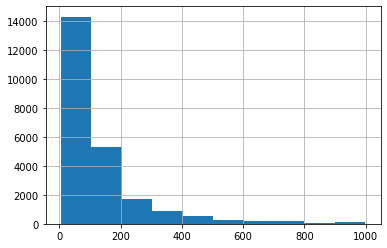

In [ ]:
df[df["kategori"]=="Kokteyl Parti"]["fiyatlar"].hist()

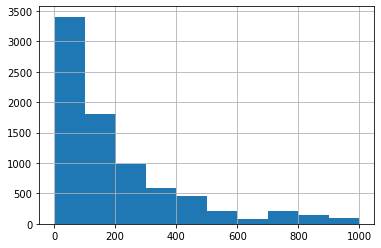

In [ ]:
df[df["kategori"]=="Kına Elbisesi"]["fiyatlar"].hist()

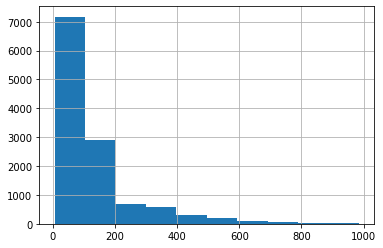

In [ ]:
df[df["kategori"]=="Mezuniyet"]["fiyatlar"].hist()

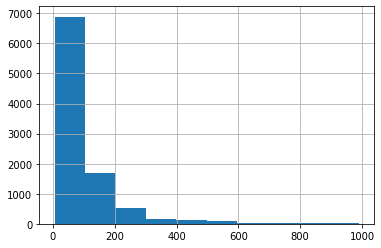

In [ ]:
df[df["kategori"]=="Mini"]["fiyatlar"].hist()

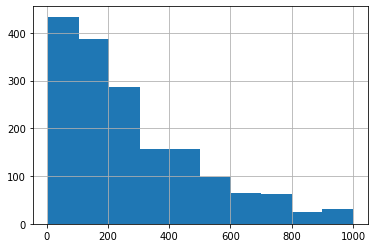

In [ ]:
df[df["kategori"]=="Nişan Elbisesi"]["fiyatlar"].hist()

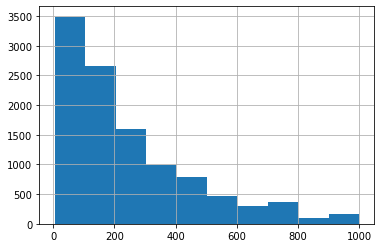

In [ ]:

df[df["kategori"]=="Nişanlık"]["fiyatlar"].hist()

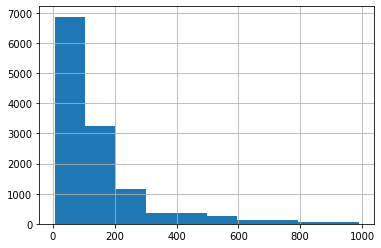

In [ ]:
df[df["kategori"]=="Resmi Gece"]["fiyatlar"].hist()

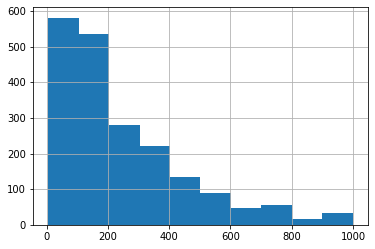

In [ ]:
df[df["kategori"]=="Uzun Abiye & Tuvalet"]["fiyatlar"].hist()

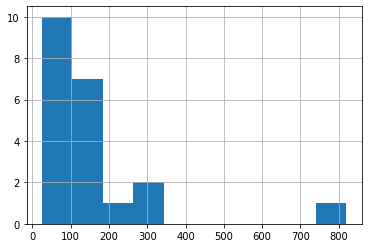

In [ ]:
df[df["kategori"]=="Abiye Tulum"]["fiyatlar"].hist()

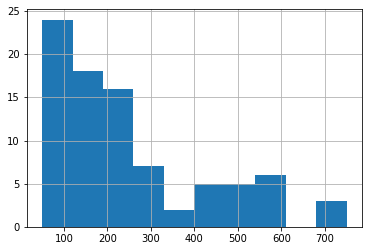

In [ ]:
df[df["kategori"]=="Balık Abiye"]["fiyatlar"].hist()

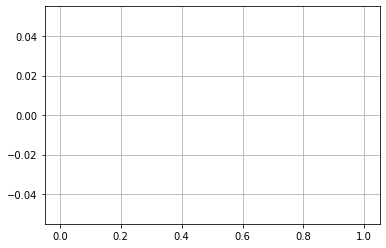

In [ ]:
df[df["kategori"]=="Gelinlik"]["fiyatlar"].hist()

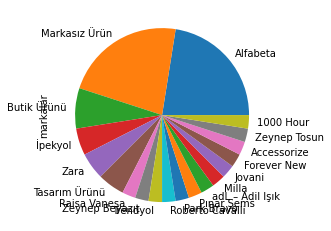

In [ ]:
abc = df[(df['yorumlar']  > 50) | (df['begeniler'] >50)]["markalar"]
abc.value_counts().plot(kind="pie")


Alfabeta          9
Markasız Ürün     9
Butik Ürünü       3
İpekyol           2
Zara              2
                 ..
Neşem Gelinlik    0
Nichii            0
Nicole Miller     0
Niente            0
Kenzie            0
Name: markalar, Length: 2036, dtype: int64

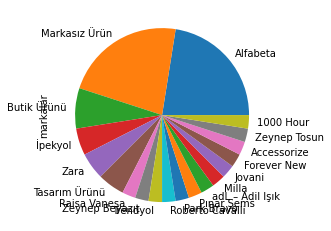

In [ ]:
abd = df[(df['yorumlar']  > 50) | (df['begeniler'] >50)]["markalar"]
abc.value_counts().plot(kind="pie")
abd.value_counts()

In [ ]:
abe = df[(df['begeniler']  > 20) & (df['fiyatlar'] >500) & (df['kategori'] == "Nişanlık")]
abe.markalar.value_counts()

Alfabeta                 2
Sherri Hill              1
Akay Gelinlik            1
Butik Ürünü              1
Tasarım Ürünü            1
                        ..
Nilmark Pret-A Porter    0
Nina Ricci               0
Nine West                0
Nisa Gümüş               0
1000 Hour                0
Name: markalar, Length: 2036, dtype: int64

In [ ]:
abf = df[(df['begeniler']  > 20) & (df['fiyatlar'] >500) & (df['kategori'] == "Kokteyl Parti")]
abf.markalar.value_counts()

Raisa Vanesa             2
İpekyol                  1
Aidan Mattox             1
Valentino                1
Jovani                   1
                        ..
Nilmark Pret-A Porter    0
Nina Ricci               0
Nine West                0
Nisa Gümüş               0
1000 Hour                0
Name: markalar, Length: 2036, dtype: int64

In [ ]:
abg = df[(df['begeniler']  > 20) & (df['fiyatlar'] >500) & (df['kategori'] == "Mezuniyet")]
abg.markalar.value_counts()

Oleg Cassini    2
Forever New     1
Ilmio           1
İpekyol         0
Element         0
               ..
Nine West       0
Nisa Gümüş      0
Nisan Triko     0
Nisse           0
1000 Hour       0
Name: markalar, Length: 2036, dtype: int64

In [ ]:
df.markalar.unique()

[Diğer, Trendyol, Alfabeta, Markasız Ürün, Butik Ürünü, ..., Ivana Sert, Boz Sisters, Kilibbi, Foley + Corinna, Vera & Lucy]
Length: 2036
Categories (2036, object): [Diğer, Trendyol, Alfabeta, Markasız Ürün, ..., Boz Sisters, Kilibbi,
                            Foley + Corinna, Vera & Lucy]

In [ ]:
len(df.kullanicilar.unique())

38679

In [ ]:
df.kullanicilar.mode()

0    Velhasili
dtype: object

In [ ]:
Velhasili = df[(df["kullanicilar"] == "Velhasili")]
Velhasili

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
62439,Velhasili,Butik Ürünü,80.0,M / 38,Nişanlık,2.0,0.0
62514,Velhasili,butikkombin,230.0,L / 40,Nişan Elbisesi,8.0,0.0
62803,Velhasili,Butik Ürünü,80.0,L / 40,Nişanlık,2.0,2.0
62804,Velhasili,Butik Ürünü,140.0,L / 40,Nişanlık,6.0,0.0
62805,Velhasili,Butik Ürünü,140.0,M / 38,Nişanlık,6.0,7.0
...,...,...,...,...,...,...,...
63427,Velhasili,Markasız Ürün,180.0,M,Tuvalet,1.0,0.0
63428,Velhasili,Markasız Ürün,100.0,M,Tuvalet,0.0,0.0
63429,Velhasili,Markasız Ürün,100.0,M,Uzun Abiye & Tuvalet,0.0,0.0
63430,Velhasili,Markasız Ürün,130.0,M,Tuvalet,0.0,0.0


In [ ]:
max(Velhasili.fiyatlar)

230.0

In [ ]:
Velhasili.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyatlar,163.0,111.907975,36.854537,35.0,85.0,110.0,145.0,230.0
begeniler,163.0,0.901840,1.466560,0.0,0.0,0.0,1.0,8.0
yorumlar,163.0,0.122699,0.859033,0.0,0.0,0.0,0.0,8.0


In [ ]:
Velhasili.kategori.value_counts(ascending=False)

Tuvalet                 151
Uzun Abiye & Tuvalet      6
Nişanlık                  5
Nişan Elbisesi            1
Resmi Gece                0
Payetli Elbise            0
Mini Elbise               0
Mini                      0
Mezuniyet                 0
Maxi Elbise               0
Maxi & Uzun Elbise        0
Kına Elbisesi             0
Kokteyl Parti             0
Günlük Elbise             0
Balık Abiye               0
Abiye Tulum               0
Name: kategori, dtype: int64

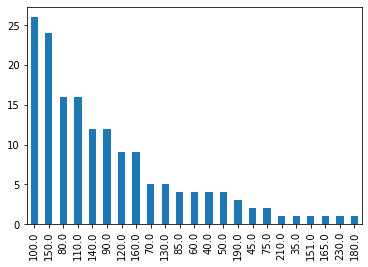

In [ ]:
Velhasili.fiyatlar.value_counts(ascending=False).plot(kind="bar")

In [ ]:
df.groupby("markalar").agg({'fiyatlar' : ['min', 'max'], 'begeniler' : ['min', 'max']})

fiyatlar        begeniler      
                  min    max       min   max
markalar                                    
1000 Hour         5.0  950.0       0.0  13.0
17 Sundays       10.0  900.0       0.0  33.0
1v1y              9.0  900.0       0.0   8.0
2 Star            5.0  900.0       0.0  18.0
2 Ters 1 Düz      5.0  600.0       0.0  20.0
...               ...    ...       ...   ...
İhya             50.0  850.0       0.0   4.0
İkikız           90.0   90.0       0.0   0.0
İnci             75.0  750.0       0.0   2.0
İpekevi          40.0  850.0       0.0  22.0
İpekyol           5.0  975.0       0.0  41.0

[2036 rows x 4 columns]

In [ ]:
df.groupby("fiyatlar").agg({'yorumlar' : ['min', 'max'], 'begeniler' : ['min', 'max']})

yorumlar       begeniler      
              min   max       min   max
fiyatlar                               
2.0           0.0   0.0       1.0   1.0
5.0           0.0  50.0       0.0  14.0
6.0           0.0   0.0       0.0   2.0
7.0           0.0   2.0       0.0   5.0
8.0           0.0   4.0       0.0   4.0
...           ...   ...       ...   ...
985.0         0.0   0.0       0.0   8.0
987.0         0.0   0.0      12.0  12.0
990.0         0.0   7.0       0.0   9.0
995.0         0.0   0.0       0.0   5.0
999.0         0.0  15.0       0.0  13.0

[618 rows x 4 columns]

In [ ]:
df.groupby(["kategori","markalar"]).agg({'fiyatlar' : ['min','max'], 'begeniler' : ['min', 'max'],'yorumlar' : ['min','max']})

fiyatlar         ... yorumlar      
                                       min    max  ...      min   max
kategori             markalar                      ...               
Abiye Tulum          1000 Hour         NaN    NaN  ...      NaN   NaN
                     17 Sundays        NaN    NaN  ...      NaN   NaN
                     1v1y              NaN    NaN  ...      NaN   NaN
                     2 Star            NaN    NaN  ...      NaN   NaN
                     2 Ters 1 Düz      NaN    NaN  ...      NaN   NaN
...                                    ...    ...  ...      ...   ...
Uzun Abiye & Tuvalet İhya              NaN    NaN  ...      NaN   NaN
                     İkikız            NaN    NaN  ...      NaN   NaN
                     İnci             85.0  750.0  ...      0.0   0.0
                     İpekevi         180.0  299.0  ...      0.0   3.0
                     İpekyol          50.0  975.0  ...      0.0  38.0

[32576 rows x 6 columns]

In [ ]:
max(df.fiyatlar)

999.0

In [ ]:
df.groupby(["bedenler","fiyatlar"]).agg({'begeniler' : ['min', 'max'],'yorumlar' : ['min','max']})

begeniler     yorumlar    
                        min max      min max
bedenler fiyatlar                           
0        2.0            NaN NaN      NaN NaN
         5.0            NaN NaN      NaN NaN
         6.0            NaN NaN      NaN NaN
         7.0            NaN NaN      NaN NaN
         8.0            NaN NaN      NaN NaN
...                     ...  ..      ...  ..
XXS / 32 985.0          NaN NaN      NaN NaN
         987.0          NaN NaN      NaN NaN
         990.0          NaN NaN      NaN NaN
         995.0          NaN NaN      NaN NaN
         999.0          NaN NaN      NaN NaN

[19158 rows x 4 columns]

In [ ]:
df.kategori.unique()

[Mezuniyet, Kına Elbisesi, Uzun Abiye & Tuvalet, Kokteyl Parti, Nişan Elbisesi, ..., Nişanlık, Mini Elbise, Günlük Elbise, Maxi Elbise, Maxi & Uzun Elbise]
Length: 16
Categories (16, object): [Mezuniyet, Kına Elbisesi, Uzun Abiye & Tuvalet, Kokteyl Parti, ...,
                          Mini Elbise, Günlük Elbise, Maxi Elbise, Maxi & Uzun Elbise]

In [ ]:
len(df.fiyatlar.unique())

619

In [ ]:
uzun_el = df[(df["kategori"] == "Uzun Abiye & Tuvalet")]
max(uzun_el.fiyatlar)


999.0

In [ ]:
df.fiyatlar = df.fiyatlar.fillna(0)
df['fiyat_grup'] = pd.qcut(df['fiyatlar'], q = 5)
df

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar,fiyat_grup
0,lavieenrose34,Diğer,640.0,M / 38,Mezuniyet,4.0,0.0,"(250.0, 999.0]"
1,nazliozmenn,Trendyol,140.0,XS / 34,Mezuniyet,0.0,0.0,"(139.0, 250.0]"
2,Melekmt,Alfabeta,0.0,XS / 34,Kına Elbisesi,5.0,0.0,"(-0.001, 50.0]"
3,eeezgiiiiiiiii,Markasız Ürün,900.0,M / 38,Kına Elbisesi,6.0,1.0,"(250.0, 999.0]"
4,slmhyrtc,Diğer,490.0,M / 38,Uzun Abiye & Tuvalet,3.0,0.0,"(250.0, 999.0]"
...,...,...,...,...,...,...,...,...
95690,aserrra,Y-LONDON,80.0,M / 38,Mini,2.0,0.0,"(50.0, 85.0]"
95691,atolyenb,Trendyol,250.0,M / 38,Kokteyl Parti,9.0,21.0,"(139.0, 250.0]"
95692,kids,Markasız Ürün,200.0,L / 40,Mezuniyet,1.0,0.0,"(139.0, 250.0]"
95693,turuncunuzblog,Butik Ürünü,200.0,L / 40,Tuvalet,0.0,0.0,"(139.0, 250.0]"


In [ ]:
df.fiyat_grup.value_counts()

(-0.001, 50.0]    22723
(139.0, 250.0]    19968
(85.0, 139.0]     18718
(250.0, 999.0]    18284
(50.0, 85.0]      16002
Name: fiyat_grup, dtype: int64

In [ ]:
#Rastgele gozlem secımı
df1 = df[df["markalar"]== "1000 Hour"] 
df_s1 = df1.sample(n=50,random_state=1)
df_s1["fiyatlar"].mean()   


110.06

In [ ]:
import pandas as pd
import numpy as np

#Bootstrap 
#istatiksel çıkarım yapmak amacıyla olarak populasyondan n sayıda örneklem çıkarmak anlamında kullanbılırız
#np.random.choice()
boot = np.random.choice(df["fiyatlar"],size=100)
boot = pd.DataFrame(boot)
boot.describe().T

,count,mean,std,min,25%,50%,75%,max
0,100.0,179.88,178.820223,0.0,60.0,100.0,235.0,900.0


In [ ]:

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


import requests
import urllib.request
import time 


pages = np.arange(1,1532,1)

link = []
fiyatlar = []
markalar = []
bedenler = []
kullanicilar = []
likes = []
comments = []
kategori = []

for i, value in enumerate(pages):
    
    
    get_url = "https://www.modacruz.com/c/gelinlik?pg=" + str(value) 
    link.append(get_url)
    page = requests.get(link[i])
    soup = BeautifulSoup(page.content, 'html.parser')
    asd = soup.find_all("div",{"class" : "_mB _aH _Q"})
    
    for prod in asd:
        
        fiyat = prod.find("div",{"class" : "_rY"}).text.replace("\n","").strip()  
        marka = prod.find("span",{"class" : "_lc"}).text.replace("\n","").strip()
        kats = prod.find("span",{"class" : "_ld"}).text.replace("\n","").strip()
        beden = prod.find("span",{"class" : "_s0"}).text.replace("\n","").strip()
        like = prod.find("a",{"class" : "_lh undefined"}).text.replace("\n","").strip()
        comment = prod.find("span",{"class" : "_lf"}).text.replace("\n","").strip() 
        kullanici = prod.find("span",{"class" : "_sX"}).text.replace("\n","").strip()
        
        kategori.append(kats)
        bedenler.append(beden)
        comments.append(comment)
        likes.append(like)        
        markalar.append(marka)
        fiyatlar.append(fiyat)
        kullanicilar.append(kullanici)
        
print(markalar)

yeni_df = pd.DataFrame({'kullanicilar':kullanicilar,'markalar':markalar,
                   'fiyatlar':fiyatlar,'bedenler':bedenler,'kategori':kategori,
                   'begeniler':likes,'yorumlar':comments}) 
yeni_df.to_csv('gelinlik.csv', index=False, encoding='utf-8')






['2B', 'Milano', 'Akay Gelinlik', 'Aysira', 'Tasarım Ürünü', 'Aysira', 'Akay Gelinlik', 'Pierre Cardin', 'Aysira', 'Oleg Cassini', 'Oleg Cassini', 'Miss Defne', 'Ivory', 'Markasız Ürün', 'Markasız Ürün', 'Aysira', 'Markasız Ürün', 'Markasız Ürün', 'Aysira', 'Diğer', 'Aysira', 'Diğer', 'Markasız Ürün', 'Diğer', 'Adidas', 'Tasarım Ürünü', 'Diğer', 'Adidas', 'Akay Gelinlik', 'Pronovias', 'Batik', 'Tasarım Ürünü', 'Markasız Ürün', 'Butik Ürünü', 'Akay Gelinlik', 'Pierre Cardin', 'Aysira', 'Aysira', 'Butik Ürünü', 'Oleg Cassini', 'Tasarım Ürünü', 'Diğer', 'Tasarım Ürünü', 'Aysira', 'Narin Moda Gelinlik', 'Markasız Ürün', 'Diğer', 'Aysira', 'Aysira', 'Markasız Ürün', 'Queen Bee', 'Diğer', 'Akay Gelinlik', 'Vakko', 'Markasız Ürün', 'Diğer', 'Aysira', '2B', 'Trendyol', 'Diğer', 'Enzoani', 'Pierre Cardin', 'Tasarım Ürünü', 'Diğer', '1000 Hour', 'Diğer', 'Oleg Cassini', 'Diğer', 'Oleg Cassini', 'Aysira', 'Aysira', 'Markasız Ürün', 'Wedze', '1v1y', 'Diğer', 'Diğer', 'Diğer', 'Akay Gelinlik', 'Aka